## Part 1: Exploratory Data Analysis

In [1]:
import pandas as pd
data = pd.read_csv('project1.data')
data.head()

/tmp/ipykernel_38/2420265470.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,car_name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino


#### Identify shape and size of the raw data:

In [2]:
# Identify shape of raw data
data.shape

(398, 9)

In [3]:
# Identify size of raw data
data.size

3582

#### Get information about the types of data. Does it need any datatype conversion? If needed perform the conversion.

In [4]:
# Get information about the types of data. Does it need any datatype conversion? If needed perform the conversion.
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    398 non-null    object 
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model_year    398 non-null    int64  
 7   origin        398 non-null    int64  
 8   car_name      398 non-null    object 
dtypes: float64(3), int64(4), object(2)
memory usage: 28.1+ KB


**<i>We can see that there are two columns with type object - horsepower and car_name. For car_name, we will leave alone, as it is best represented by string type and we presumably won't need it later in our ML model(s); however, we will aim to convert horsepower to a numerical Dtype, float.</i>**

In [5]:
import numpy as np
# Replace non-numeric values with NaN
data['horsepower'] = data['horsepower'].replace('?', np.nan)

# Convert horsepower column type to float
data['horsepower'] = data['horsepower'].astype(float)

# Check updated Dtype
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    392 non-null    float64
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model_year    398 non-null    int64  
 7   origin        398 non-null    int64  
 8   car_name      398 non-null    object 
dtypes: float64(4), int64(4), object(1)
memory usage: 28.1+ KB


**<i>In the code block above, when I first tried converting 'horsepower' column to type float, I got an error, saying couldn't convert '?' to float. I didn't know the function to replace '?' with NaN, so I referred to chatGPT to help me figure it out.</i>**

**<i>Notice that once we converted horsepower to float, there are not 392 non-null out of 398 rows, suggesting we address this issue and possibly replacing these null values. The solution will be to fill in all missing values with the statistical mean of the horsepower column.</i>**

In [6]:
data.isnull().sum()

mpg             0
cylinders       0
displacement    0
horsepower      6
weight          0
acceleration    0
model_year      0
origin          0
car_name        0
dtype: int64

In [8]:
data['horsepower'].fillna(data['horsepower'].mean(), inplace=True)

/tmp/ipykernel_38/2576002133.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['horsepower'].fillna(data['horsepower'].mean(), inplace=True)


In [9]:
data.loc[pd.isnull(data['horsepower']), 'horsepower']

Series([], Name: horsepower, dtype: float64)

In [10]:
data.loc[data.mpg == 0, 'mpg']

Series([], Name: mpg, dtype: float64)

In [11]:
data.loc[data.horsepower == 0, 'horsepower']

Series([], Name: horsepower, dtype: float64)

#### Derive statistical information from the data: can you predict any outliers using this information?

In [12]:
# Derive statistical information from data using describe() function
data.describe()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin
count,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000
mean,23.514573,5.454774,193.425879,104.469388,2970.424623,15.568090,76.010050,1.572864
std,7.815984,1.701004,104.269838,38.199187,846.841774,2.757689,3.697627,0.802055
min,9.000000,3.000000,68.000000,46.000000,1613.000000,8.000000,70.000000,1.000000
25%,17.500000,4.000000,104.250000,76.000000,2223.750000,13.825000,73.000000,1.000000
50%,23.000000,4.000000,148.500000,95.000000,2803.500000,15.500000,76.000000,1.000000
75%,29.000000,8.000000,262.000000,125.000000,3608.000000,17.175000,79.000000,2.000000
max,46.600000,8.000000,455.000000,230.000000,5140.000000,24.800000,82.000000,3.000000


**<i>Not sure if we can accurately identify whether there are possible outlier(s) by merely looking at the statistics.</i>**

#### Perform one-hot encoding of categorical data if needed
<i>At first I hot-encoded the car_name column, then realized it probably isn't the best approach, as there are 394 unique car_names.</i>
In case for future:
data['car_name'] = data['car_name'].astype("category")
data = pd.get_dummies(data, columns=['car_name'], drop_first=True)


#### Visualize Dataset Through Different Univariate Plots

<Axes: xlabel='model_year', ylabel='Count'>

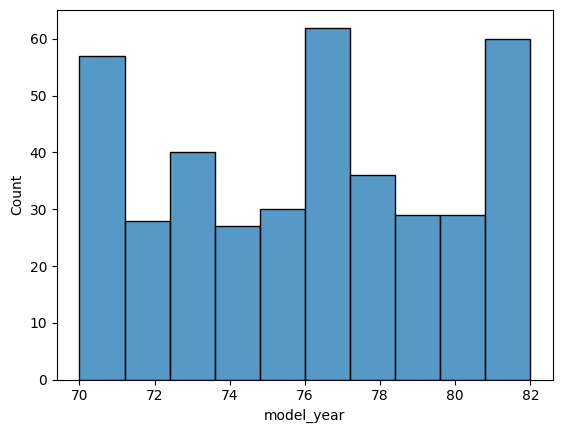

In [13]:
import seaborn as sns
sns.histplot(data=data['model_year'])

<Axes: xlabel='mpg', ylabel='Count'>

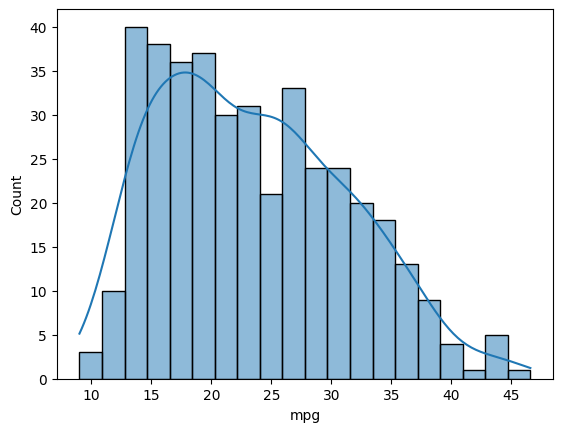

In [14]:
sns.histplot(data['mpg'], bins=20, kde=True)

<Axes: xlabel='horsepower', ylabel='Count'>

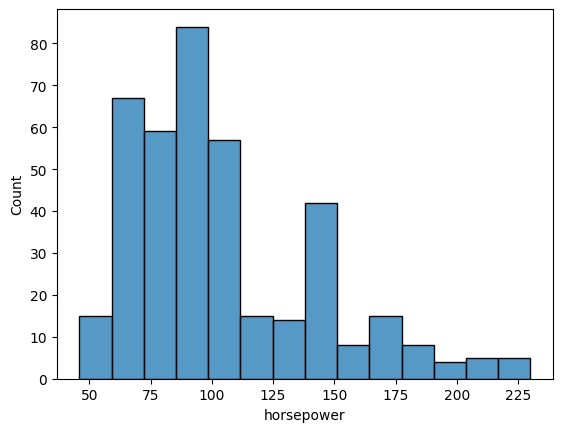

In [15]:
sns.histplot(data['horsepower'])

<Axes: ylabel='weight'>

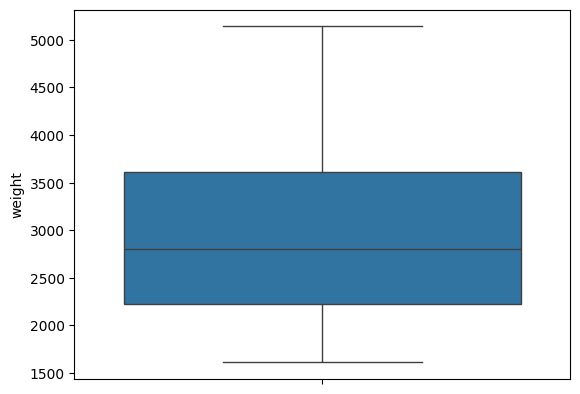

In [16]:
sns.boxplot(data['weight'])

#### Visualize Dataset Through Different Bivariate Plots

<Axes: xlabel='cylinders', ylabel='mpg'>

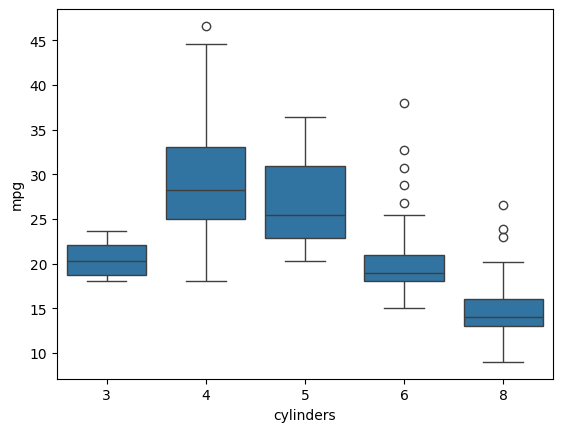

In [17]:
sns.boxplot(x='cylinders', y='mpg', data=data)

<Axes: xlabel='horsepower', ylabel='mpg'>

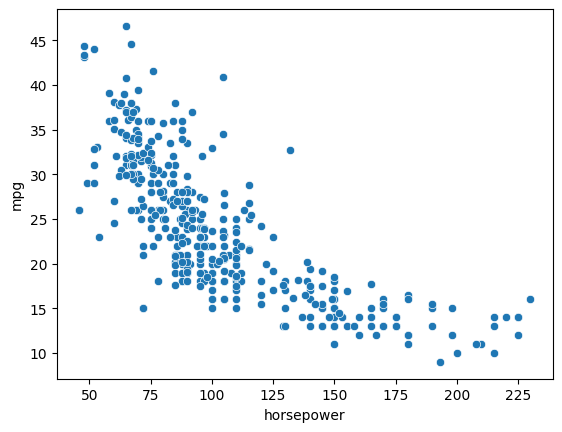

In [18]:
sns.scatterplot(x='horsepower', y='mpg', data=data)

<Axes: >

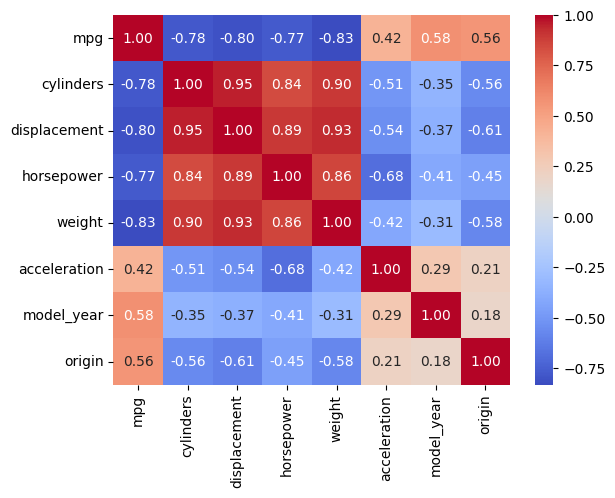

In [19]:
data_corr = data.drop(columns='car_name') # need to drop car_name in order to call .corr(), as it is not numeric type
corr_matrix = data_corr.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")

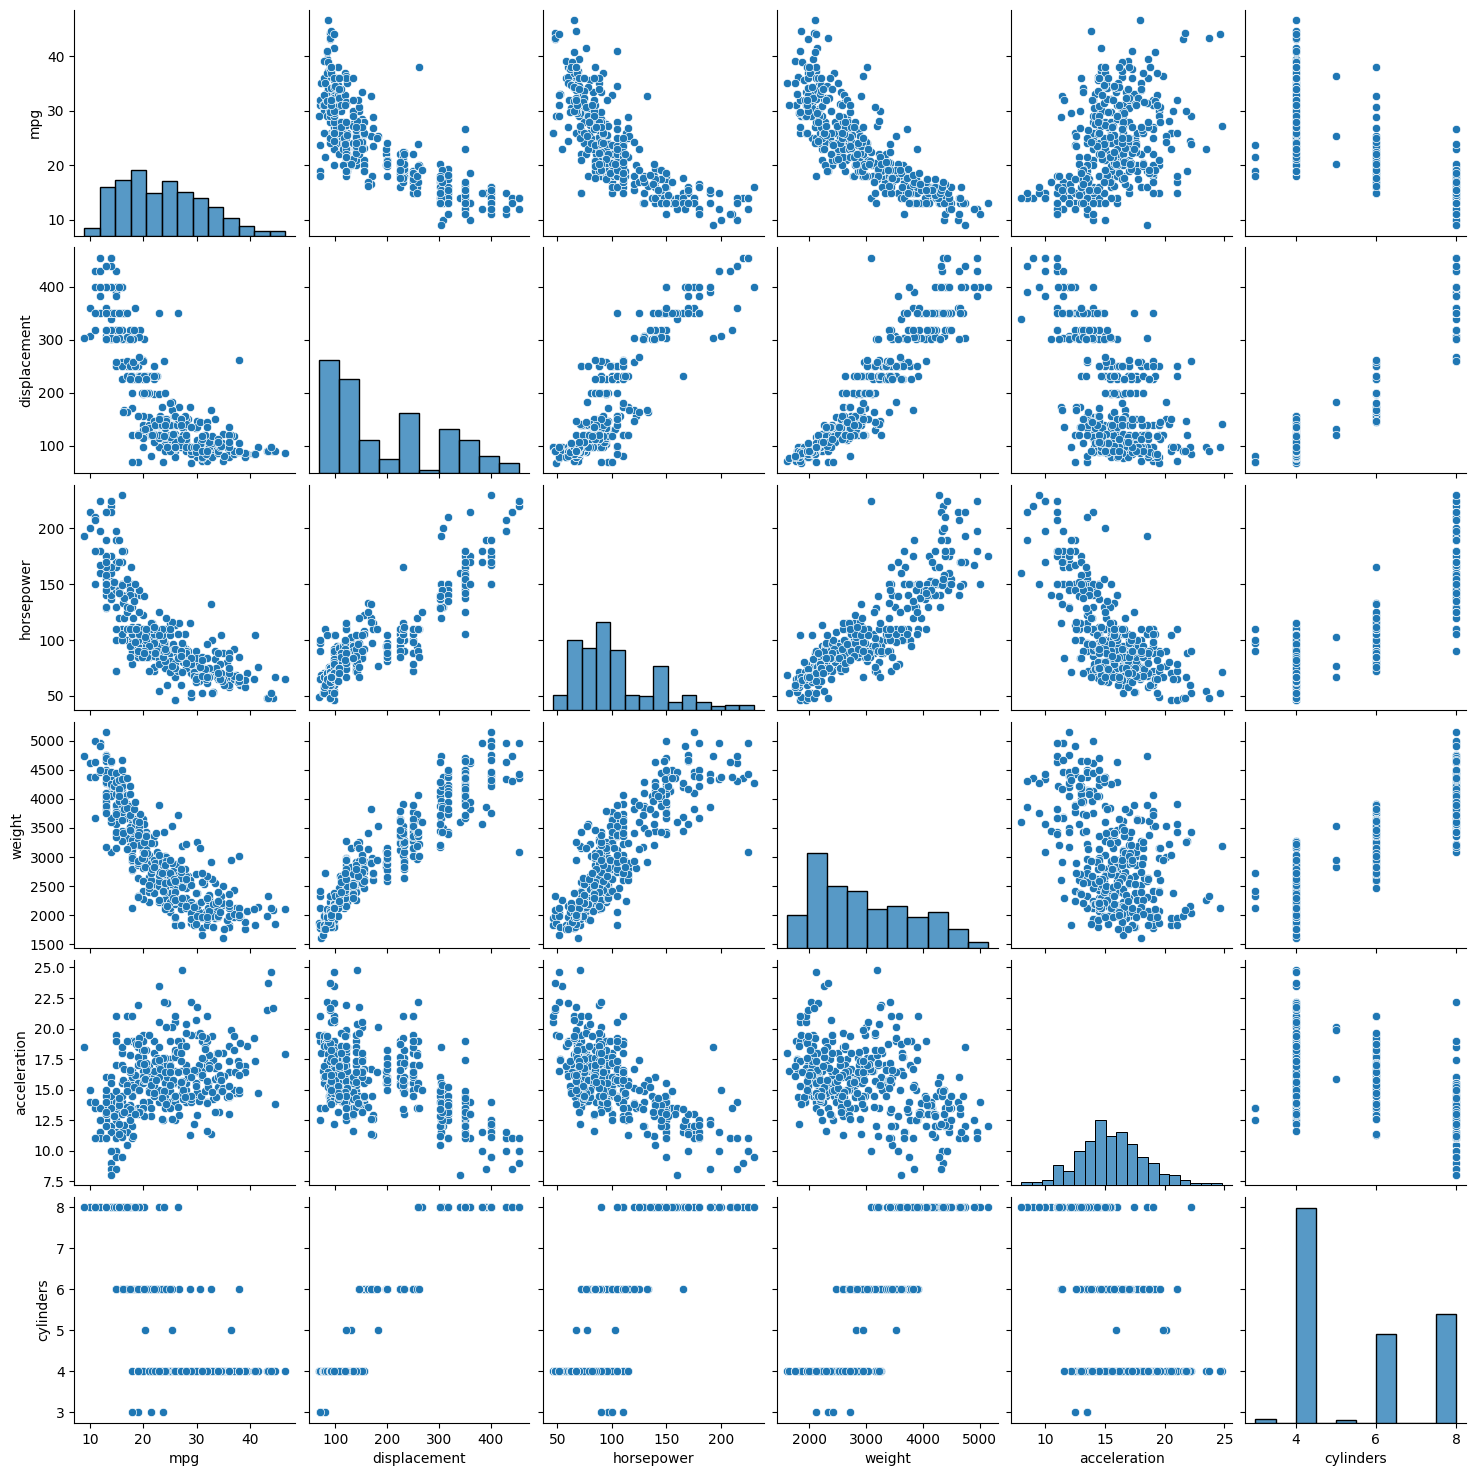

In [20]:
sns.pairplot(data[['mpg', 'displacement', 'horsepower', 'weight', 'acceleration', 'cylinders']])

**<i>From visualizing the various bivariate plot, we identify that there are four possible predictors of fuel efficiency of cars (mpg variable): cylinders, displacement, horsepower, and weight. Specifically, the correlation heat matrix and the pair plots show that all four predictors seem to have a relatively strong, negative correlation with mpg, our response variable representing the fuel effiency of cars. </i>**

**<i>Important to note that I referred to chatGPT to figure out about pairplot() and heatmap(), two helpful functions that allowed for a comprehensive analysis of the variables within our dataset and how they're correlated.</i>**

## Part 2: Fit Regression models on the data to predict the fuel efficiency of cars:

#### Split the dataset into Training and Test sets

In [21]:
X = data[['cylinders', 'displacement', 'horsepower', 'weight'] ]
y = data['mpg']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

In [22]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    398 non-null    float64
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model_year    398 non-null    int64  
 7   origin        398 non-null    int64  
 8   car_name      398 non-null    object 
dtypes: float64(4), int64(4), object(1)
memory usage: 28.1+ KB


#### Fit Linear Regression Model

In [24]:
from sklearn import linear_model

mpg_lr = linear_model.LinearRegression()
mpg_lr.fit(X_train, y_train)

LinearRegression()

#### Calculate Accuracy for Training and Testing Data

In [47]:
# Get accuracy of model
print("Test Score:", mpg_lr.score(X_test, y_test))
print("Train Score:", mpg_lr.score(X_train, y_train))

Test Score: 0.7490524242533151
Train Score: 0.6868525566338963


480
120


ValueError: x and y must be the same size

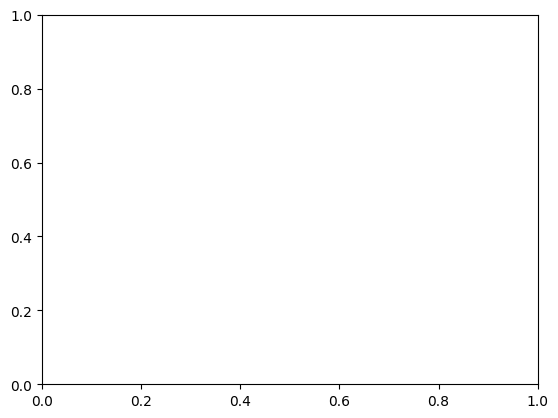

In [34]:
import matplotlib.pyplot as plt
mpg_lr_predict = mpg_lr.predict(X_test)
plt.scatter(X_test['horsepower'], y_test, color="black")
plt.plot(X_test, mpg_lr_predict, color="blue", linewidth=3)